# Abalone

My analysis of the abalone dataset.

### Overview

This dataset includes various physical measurements related to abalone, a type of sea snail. The objective of this data analysis is to illustrate the correlation between these easier-to-measure physical attributes and the age of abalone, as previous measures rendered far too time consuming.

The data set is divided into two measurements, length (in mm) and weight (in grams), length is divided into the length of the shell, the diameter and the height. While weight considers the whole weight of the abalone, the weight of the meat, the gut weight and the shell weight. Each abalone are divided into three categories: male, female and infant. And finally the traditional more time consuming marker of abalone age; ring number, have also been included. 

In [348]:
# Data frames.
import pandas as pd

### Pandas
Pandas is a Python library. It is necessary to work with the abalone data set. With pandas we can read the data and conduct our analysis.

In [349]:
# Load the abalone data set from csv file.
abalone = pd.read_csv("abalone.csv")

The read_csv() function allows us to open our data set and access what's inside.

In [350]:
# To display the first 5 and last 5 samples in the dataset
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Above we can see a small insight into the first 5 and last 5 entries in our dataset. Along the top we can see our variable: sex, length, diameter, height, etc. The left-hand side column shows the number of the entry, beginning with 0 until 4176. We can see from this tiny glimpse that most of the variables are *floats* or decimals, except for the "sex" and "rings" variables which are *strings* (or text) and *integers* (whole numbers), respectively.

### Python Types

#### Number Columns
Length, diameter, height, whole weight, shucked weight, viscera weight and shell weight are all expressed using decimals and so the appropriate data type for these columns is __float__. This allows python to interpret the precise decimals in our measurements.

#### Discrete Number Columns
The number of rings an abalone has is expressed using whole numbers or integers, where decimals are not present. In this case **int** is appropriate.

#### Category Columns
The sex of the abalone is categorised in three ways: Male, Female and Infant or M, F and I. As these are not expressed with numbers, they will be stored as categorical data using **category**.

In [351]:
# using pandas to describe the data set i.e. show number of samples, mean, standard deviation, min and max
description = abalone.describe()

# to print the descriptive statistics
description

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Here we have implemented pandas to provide a concise overview of the data set. This includes the number of samples, in each case 4177, which indicates there are no missing values from the data set. The mean values show us the average measurements for each variable. While the standard deviation shows how much variation there is between each value and the mean. And the min and max represent the smallest value and the largest value within the given variable, in other words, the range of the variables in the dataset. The quartiles 25%, 50% and 75% give us an insight into the distribution or shape of the data set. 

In [352]:
# imports matplotlib so that we can create plots.
import matplotlib.pyplot as plt

### Matplotlib.pyplot
This library allows us to create plots or visuals for our dataset, such as bar charts, histograms and scatter plots. These will make it easier to identify trends, patterns and relationships between variables.

<function matplotlib.pyplot.show(close=None, block=None)>

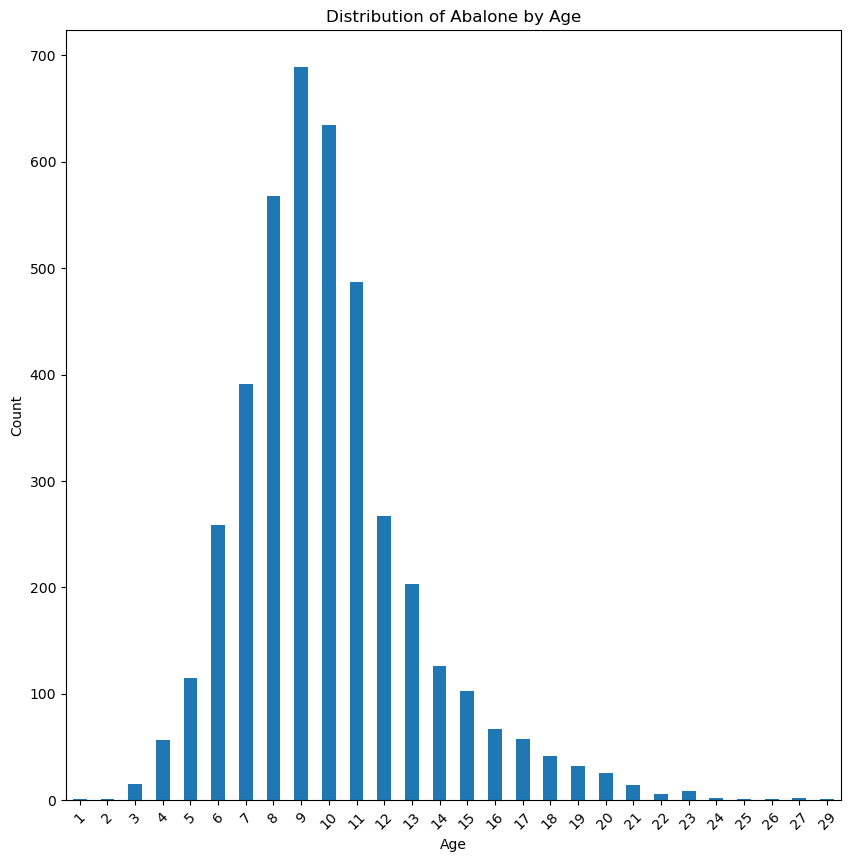

In [353]:
# creates a bar chart to show the distribution of "sex"
plt.figure(figsize=(10, 10)) #width and height
abalone["rings"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Abalone by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45) # puts labels at an angle for ease of reading
plt.show

Here we have created a bar chart in order to visualise the age of the abalone. We can see here that the age or number of rings are positively skewed and that the majority of abalone are 9. We can see the wide range in the age of abalone, ranging from 1 to 29, however we can also see that this large range is caused primarily by outliers, the interquartile range or the difference between the 25th and 75th percentiles shows a range of just 3, between ages 8 and 11. From this we can see that our outlier threshold is between 4 and 16. 

In [354]:
# dividing the data set into the different sexes, may be useful later.
male = abalone[abalone["sex"]== "M"]
female = abalone[abalone["sex"]== "F"]
infant = abalone[abalone["sex"]== "I"]

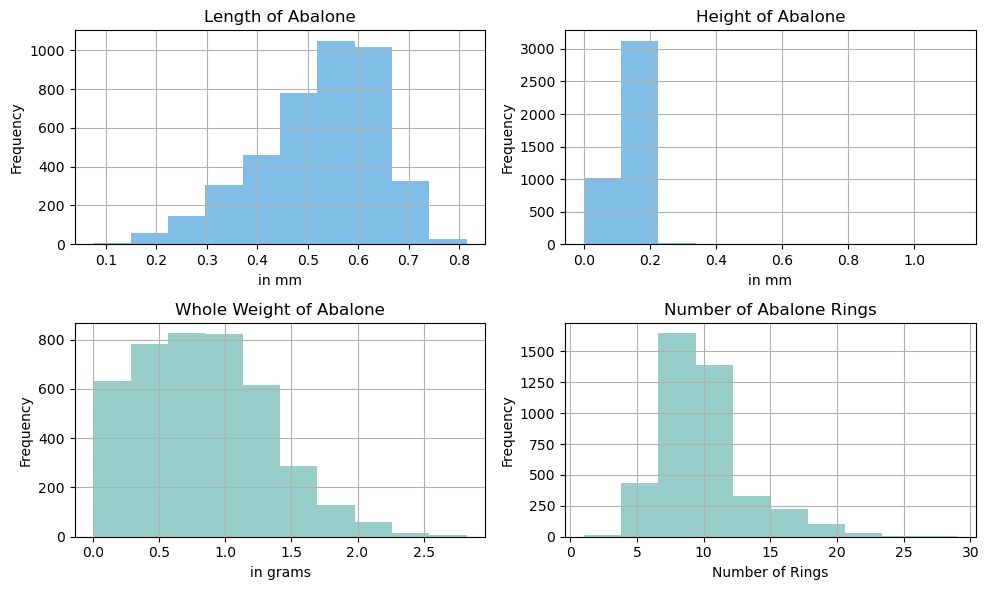

In [355]:
# Creating a subplot of histograms for an overview of 4 variables:
variable_overview, axes= plt.subplots(nrows=2, ncols=2, figsize=(10, 6)) # Creates a four histogram plot, number of rows and columns specified and the size of the figure in inches
abalone["length"].hist(ax=axes[0,0], color="#4ca3dd", alpha=0.7)  # isolates length column and assigns it to row 1, column 1, alpha refers to the opacity
axes[0,0].set_xlabel("in mm") # labels the x axis, along the bottom
axes[0,0].set_ylabel("Frequency") # labels the y axis, up the side
axes[0,0].set_title("Length of Abalone") # gives a title to this individual histogram

abalone["height"].hist(ax=axes[0,1], color="#4ca3dd", alpha=0.7)
axes[0,1].set_xlabel("in mm")
axes[0,1].set_ylabel("Frequency")
axes[0,1].set_title("Height of Abalone")

abalone["whole_weight"].hist(ax=axes[1,0], color="#6bbab3", alpha=0.7) # hexadecimal colour to match abalone colour scheme
axes[1,0].set_xlabel("in grams")
axes[1,0].set_ylabel("Frequency")
axes[1,0].set_title("Whole Weight of Abalone")

abalone["rings"].hist(ax=axes[1,1], color="#6bbab3", alpha=0.7)
axes[1,1].set_xlabel("Number of Rings")
axes[1,1].set_ylabel("Frequency")
axes[1,1].set_title("Number of Abalone Rings")
plt.tight_layout()  # prevents overlapping of subplots
plt.show()

These histograms allow us to see the general distribution of the data set within the main measurements: length, height, whole weight and number of rings. 

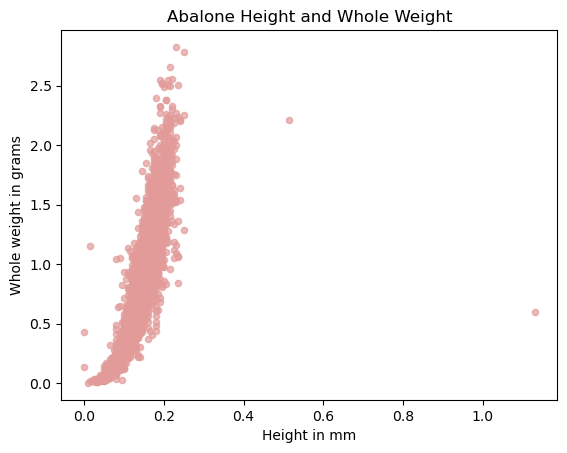

In [356]:

#Creating a scatter plot of height and whole weight
abalone.plot.scatter(x="height", y="whole_weight", color="#e29b99", alpha=0.7)
plt.xlabel("Height in mm")
plt.ylabel("Whole weight in grams")
plt.title("Abalone Height and Whole Weight")
plt.show()


In [357]:
correlation = abalone["height"].corr(abalone["whole_weight"]) #using pandas to determine the Pearson correlation coefficient
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.8192207728553599


The Pearson correlation coefficient determined a correlation of approximately 0.819 which suggests a strong positive correlation between height and whole weight. When one variable increases the other tends to follow. This is also evident in our scatter plot above, despite a very small minority of outliers, most of the values follow the same pattern.